# Building the K-mer spectra from a genome

Write functions to:
1. Calculate k-mers from DNA sequences. Check it on a sequence with L=33 using k=21. Seq='ATGGACCAGATATAGGGAGAGCCAGGTAGGACA'  How many kmers do you expect from it?
2. Calculate them directly from a FASTA file (example fastas read.fasta and Theileria provided)
3. Adapt the functions in a python program to plot the k-mer spectra of a fasta file. Apply this to a bacterial genome, Klebsiella pneumoniae:GCF_000240185.1_ASM24018v2_genomic.fasta
4. Optional Assignment (via Moodle): write a .py to do this and the plots you get with k=8

Information: 
--------------
A method of visualizing k-mers, the k-mer spectrum, shows the multiplicity of each k-mer in a sequence versus the number of k-mers with that multiplicity (see  https://en.wikipedia.org/wiki/K-mer). This is a sort of density plot, notation varies a bit the x-axis basically shows multiplicity of each kmer (number of time is repeated in the sequences or genome) and the y-axis the number of kmers at a given multiplicity (e.g. how many kmers appear 1,2,3,...100 times in the genome). For these reasons, the y-axis is sometimes called frequency and the x-axis counts by some programs.

In the case of reads, the multiplicity is "amplified" by the sequencing coverage.


In [1]:
#extract kmers: use 1-size sliding window, output is list of all kmers of input size

def c_kmers(sequence, size):
    kmers=[] #list to store kmers

    start=0 #set a strart position
    for end in range(size, len(sequence)+1): #iterate from size to end of sequence (including last character), iterate for the number of times equal to the difference of size to the end of the sequence
        kmers.append(sequence[start:end]) #append from the starting position to the end of the window, end= start+size
        start+=1 #add 1 to start, so the next window starts i character over
    
    return kmers

func=c_kmers('ATGGACCAGATATAGGGAGAGCCAGGTAGGACA', 21)
print("The number of kmers of the sequence is: ",len(func))


The number of kmers of the sequence is:  13


In [7]:
#read the sequences from a file
from Bio import SeqIO

def fastConvert(file): #converts from fastq to fasta
    fastq_file="/home/jj/Desktop/Bioinformatics/2nd_year/2term/ASAB/Theory/W6_KmerSpectra/fasta/"+file #set path to fastq file
    file=file[:-5]+"fasta" #define file as fasta
    f=open("/home/jj/Desktop/Bioinformatics/2nd_year/2term/ASAB/Theory/W6_KmerSpectra/fasta/"+file, "w")#create new fasta file, with writing permission
    for read in SeqIO.parse(fastq_file, "fastq"):#read the fastq file, and for every read
        print(">"+str(read.id), file=f)#write > and the id
        print(read.seq, file=f)#write the sequence
    f.close()
    return file

def file2seq(file):
    if ".fastq" in file: #detect if teh input is fastq
        file=fastConvert(file)#convert it to fasta and define file as the name of the fasta
        
    file="/home/jj/Desktop/Bioinformatics/2nd_year/2term/ASAB/Theory/W6_KmerSpectra/fasta/"+file #input the filenames, this sets the path
    sequence=""

    for read in SeqIO.parse(file, "fasta"): #parse trough the reads

        sequence+=str(read.seq).upper() #add the read sequence in upper case to the sequence variable

    return sequence #return the file sequence

seq=file2seq("Theileria_2500bp.fa") #get the sequence of Theileria from the file

func=c_kmers(seq, 115) #calculate how many kmers of size 115 does Theileria have
print("The number of kmers of the sequences of the file is:",len(func))
#to calculate the number of kmers on read.fasta you would change the name of the file in file2seq


The number of kmers of the sequences of the file is: 2481


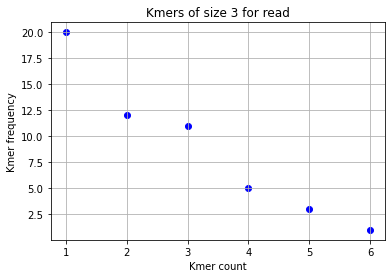

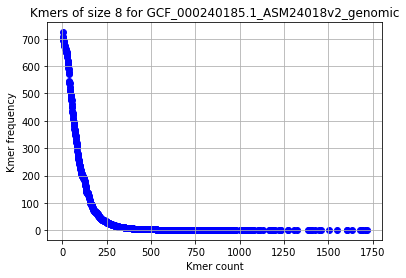

In [3]:
#get sequences from a file and write a plots
import matplotlib.pyplot as plt

def kmer_plot(file, size):

    sequence=file2seq(file) #get the sequence form the file using the previous function
    ls_kmer=c_kmers(sequence, size) #get the kmers for the sequence for the desired size
    
    #check for kmer repetitions
    kcount={}
    for kmer in ls_kmer: #iterate over kmers, if it exists add 1 to the count, if it doesent define it in the dictionary and count 1 as its value
        if kmer in kcount:
            kcount[kmer]+=1
        else:
            kcount[kmer]=1

    
    freq = list(kcount.values()) #how many times each kmer appears
    
    counted_seq = list(set(freq)) #get repetition numbers (kmers are repeated (1,2,4,5...) times)
    counted_freq={}

    for num in freq: #count how many times each number (kmer repetitions) appears (kmer AAA repeats 3 times, there are 20 kmers that appear 3 times)
        if num in counted_freq:
            counted_freq[num]+=1
        else:
            counted_freq[num]=1 
    #values are kmer number repetitions 
    sorted_count=sorted(list(counted_freq.values()), reverse=True) #sort the listof number repetitions

    #os.system(f"Rscript graph.r {list(kcount.keys())} {list(kcount.values())}")
    for letter_pos in range(len(file)-1, -1, -1): #strat from the end of the file to erase the extension
        if file[letter_pos]==".": #identify if we have reached the end of the extension
            file=file[:letter_pos] #save file as only the name of the file
            break
    

    plt.scatter(x = counted_seq, y = sorted_count, c='blue') #create the scatter plot
    plt.ylabel('Kmer frequency')
    plt.xlabel('Kmer count')
    plt.title(f"Kmers of size {size} for {file}")
    plt.grid(True)
    plt.savefig(f'{file}.jpeg') #save the plot as filename.jpeg
    plt.show()

    return ""


print(kmer_plot("read.fasta", 3))
print(kmer_plot("GCF_000240185.1_ASM24018v2_genomic.fasta", 8))